In [1]:
import numpy as np
import matplotlib.pyplot as plt
import irf
from irf.ensemble import wrf as rfc
from irf.utils import (
    get_prevalent_interactions,
    visualize_impurity_decrease,
    visualize_prevalent_interactions,
    get_filtered_feature_paths
)
import rpy2.robjects as robjects
from irf.irf_jupyter_utils import draw_tree

# Simulate the settings in the signed iRF paper

## Simulation 1: and rule

In [2]:
def load_data(i=0):
    robjects.r['load']("../../signediRF/data/gaussSim_and.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [4]:
X, y = load_data(42)

In [5]:
rf = rfc()

In [6]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

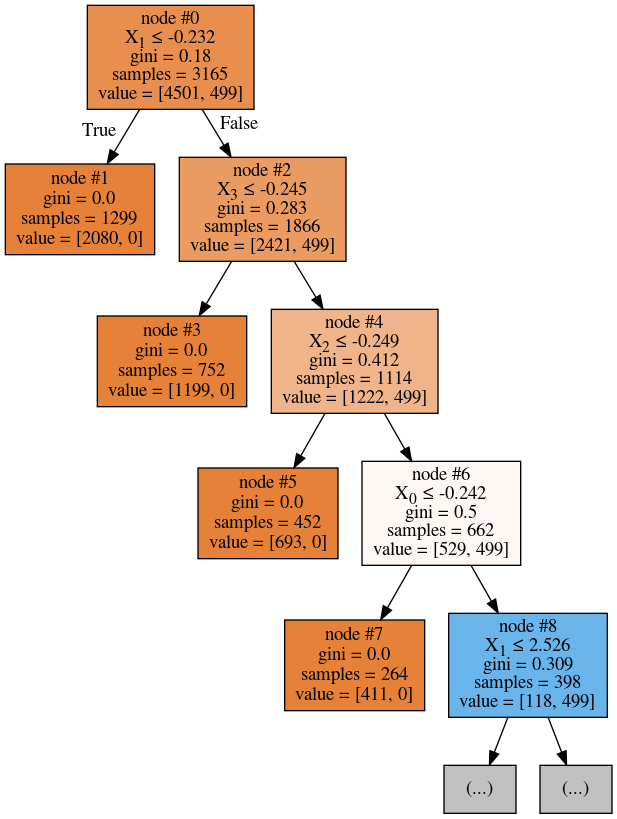

In [7]:
draw_tree(rf.estimators_[0], max_depth=4)

<BarContainer object of 50 artists>

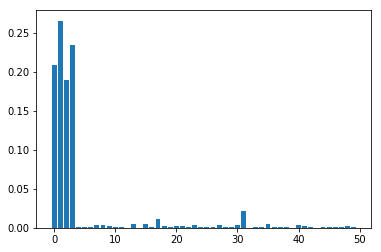

In [8]:
plt.bar(np.arange(50), rf.feature_importances_)

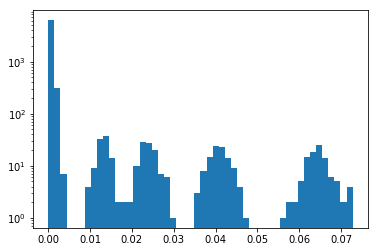

In [9]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [10]:
rf.n_paths

7317

In [16]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=0.005, min_support=500, signed=True)

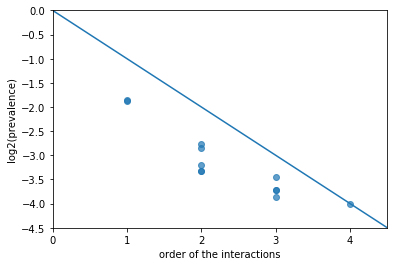

In [17]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [15]:
list(prevalence.items())[:20]

[((0, 1, 2, 3), 0.12500000000000053),
 ((0, 2, 3), 0.18375000000000177),
 ((2,), 0.5525000000000028),
 ((0, 2), 0.293750000000003),
 ((0,), 0.5412500000000044),
 ((0, 1, 2), 0.15250000000000102),
 ((1, 2, 3), 0.15125000000000102),
 ((2, 3), 0.2775000000000029),
 ((0, 1, 3), 0.13750000000000076),
 ((0, 1), 0.21750000000000222),
 ((0, 3), 0.19875000000000229),
 ((1, 2), 0.1987500000000022)]

## Simulation 2: OR rule

In [2]:
def load_data(i=0):
    robjects.r['load']("../../signediRF/data/gaussSim_or.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [11]:
X, y = load_data(10)

In [12]:
rf = rfc()

In [13]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

<BarContainer object of 50 artists>

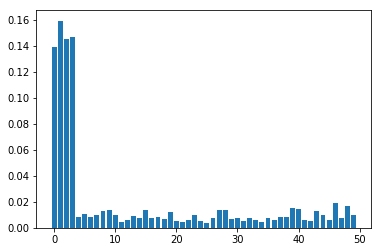

In [14]:
plt.bar(np.arange(50), rf.feature_importances_)

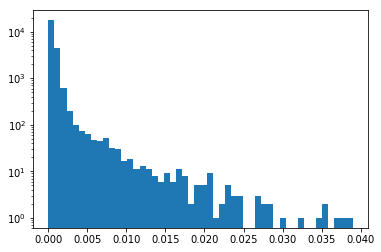

In [15]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [16]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=1e-3, min_support=500, signed=True)

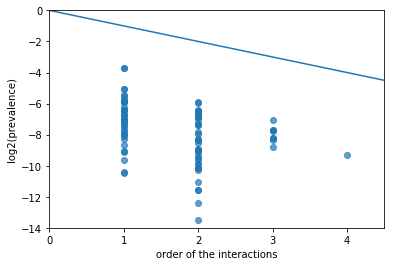

In [17]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [18]:
#visualize find out the most prevalent interactions
list(prevalence.items())

[(((0, 'R'), (1, 'R'), (2, 'L'), (3, 'L')), 0.0015804011002182954),
 (((0, 'L'), (2, 'R'), (3, 'R')), 0.007405165508389467),
 (((1, 'L'), (2, 'R'), (3, 'R')), 0.004911336898803704),
 (((0, 'L'), (1, 'L'), (2, 'R')), 0.004879085663706053),
 (((0, 'L'), (1, 'L'), (3, 'R')), 0.004649572596244967),
 (((0, 'R'), (1, 'R'), (2, 'L')), 0.003403837569057935),
 (((0, 'R'), (2, 'L'), (3, 'L')), 0.003354619778692717),
 (((0, 'R'), (1, 'R'), (3, 'L')), 0.0030594219290651344),
 (((1, 'R'), (2, 'L'), (3, 'L')), 0.0022514205425977697),
 (((2, 'R'), (3, 'R')), 0.01667043265421851),
 (((0, 'L'), (2, 'R')), 0.016243815748020998),
 (((0, 'R'), (2, 'R')), 0.011895261767785985),
 (((0, 'R'), (2, 'L')), 0.011452312439214464),
 (((1, 'L'), (2, 'R')), 0.011389472633600229),
 (((0, 'R'), (1, 'R')), 0.01029379185638391),
 (((1, 'L'), (3, 'R')), 0.009787711801764076),
 (((2, 'R'), (3, 'L')), 0.00971430571284145),
 (((1, 'L'), (3, 'L')), 0.009086422083200877),
 (((0, 'R'), (3, 'R')), 0.009066780310822649),
 (((0, 

## Simulation 3: Add rule

In [19]:
def load_data(i=0):
    robjects.r['load']("../../signediRF/data/gaussSim_add.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [23]:
X, y = load_data(49)

In [24]:
rf = rfc()

In [25]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

<BarContainer object of 50 artists>

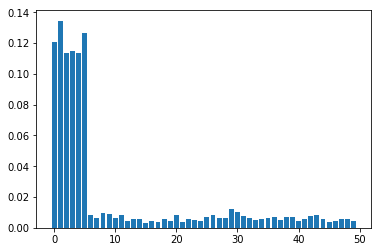

In [26]:
plt.bar(np.arange(50), rf.feature_importances_)

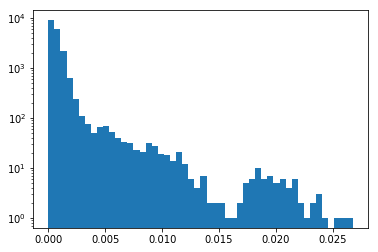

In [27]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [28]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=0.001, min_support=2000, signed=True)

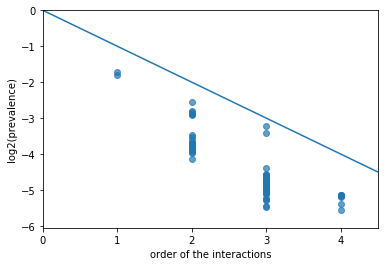

In [29]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [30]:
#visualize find out the most prevalent interactions
list(prevalence.items())[:20]

[(((0, 'R'), (1, 'R'), (2, 'R')), 0.10717773437499992),
 (((3, 'R'), (4, 'R'), (5, 'R')), 0.09420471191406261),
 (((0, 'R'), (2, 'R')), 0.1704824829101565),
 (((0, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.028376007080077988),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'L')), 0.028133087158202986),
 (((0, 'R'), (1, 'R'), (2, 'R'), (4, 'L')), 0.028099994659423717),
 (((1, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.028005371093749842),
 (((2, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.02702331542968741),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'R')), 0.024021759033203062),
 (((0, 'R'), (1, 'R'), (2, 'R'), (5, 'L')), 0.02126068115234363),
 (((1, 'R'), (2, 'R')), 0.1426513671874998),
 (((3, 'R'), (4, 'R')), 0.14114809036254855),
 (((0, 'R'), (1, 'R')), 0.13483154296874966),
 (((3, 'R'), (5, 'R')), 0.13414779663085954),
 (((4, 'R'), (5, 'R')), 0.13196594238281262),
 (((0, 'R'), (2, 'R'), (4, 'L')), 0.047494525909423636),
 (((2, 'L'), (3, 'R'), (4, 'R')), 0.042882843017577964),
 (((0, 'R'), (2, 'R'), (3, 'L')),